# Exploratory Data Analysis on Automobile data set


Dataset link: https://www.kaggle.com/datasets/toramky/automobile-dataset
        
Context
This dataset consist of data From 1985 Ward's Automotive Yearbook. Here are the sources

Sources:

1) 1985 Model Import Car and Truck Specifications, 1985 Ward's Automotive Yearbook.

2) Personal Auto Manuals, Insurance Services Office, 160 Water Street, New York, NY 10038

3) Insurance Collision Report, Insurance Institute for Highway Safety, Watergate 600, Washington, DC 20037

Content: 
This data set consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars. The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc…), and represents the average loss per car per year.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns",None)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Loading dataset

data = pd.read_csv('Automobile_data.csv')
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [3]:
data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [4]:
# check the dimension of the dataset

data.shape

(205, 26)

In [5]:
data.tail()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.4,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [6]:
data.isnull().any()

symboling            False
normalized-losses    False
make                 False
fuel-type            False
aspiration           False
num-of-doors         False
body-style           False
drive-wheels         False
engine-location      False
wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-type          False
num-of-cylinders     False
engine-size          False
fuel-system          False
bore                 False
stroke               False
compression-ratio    False
horsepower           False
peak-rpm             False
city-mpg             False
highway-mpg          False
price                False
dtype: bool

In [7]:
data.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


from the above snapshot of the data, we can see that some columns have missing values?

## Missing value detection and Treatment.

##### There are no blank records. the missing records are represented by a '?'.



#### Since some of the predictor columns are continuous in nature, there might be a change that 0's in these columns indicate missing data.

In [8]:
# Lets check the above claim.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.0,0.0,1.0,2.0,3.0
wheel-base,205.0,98.756585,6.021776,86.6,94.5,97.0,102.4,120.9
length,205.0,174.049268,12.337289,141.1,166.3,173.2,183.1,208.1
width,205.0,65.907805,2.145204,60.3,64.1,65.5,66.9,72.3
height,205.0,53.724878,2.443522,47.8,52.0,54.1,55.5,59.8
curb-weight,205.0,2555.565854,520.680204,1488.0,2145.0,2414.0,2935.0,4066.0
engine-size,205.0,126.907317,41.642693,61.0,97.0,120.0,141.0,326.0
compression-ratio,205.0,10.142537,3.972040,7.0,8.6,9.0,9.4,23.0
city-mpg,205.0,25.219512,6.542142,13.0,19.0,24.0,30.0,49.0
highway-mpg,205.0,30.751220,6.886443,16.0,25.0,30.0,34.0,54.0


##### None of the continuous columns seems to have missing value represented by 0's. We can also see that there are a total of 11 continuous variables, but the describe table has only 10 continuous variables. This is beacause column 'normalized losser' has missing values.

In [9]:
# Treating missing values in the 'normalized losser' column.

data['normalized-losses']=data['normalized-losses'].replace('?', np.nan)
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [10]:
data.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          0
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  0
stroke                0
compression-ratio     0
horsepower            0
peak-rpm              0
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

#### Normalized -losses has 41 missing data points. we will replace these missing values with median of 'Normalized - losses' because the median is least affected by outliers.

In [11]:
# Imputing missing value with their respective columns median

data.fillna(data.median(), inplace = True)
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,115.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [12]:
data.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

### Also, Notice that the data type of NormalizedLosser is Object, we have to change its data type to numeric (float).

In [14]:
data['normalized-losses'] = data['normalized-losses'].astype('float')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [16]:
# Outlier Detection and Treatment
data.columns
data.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

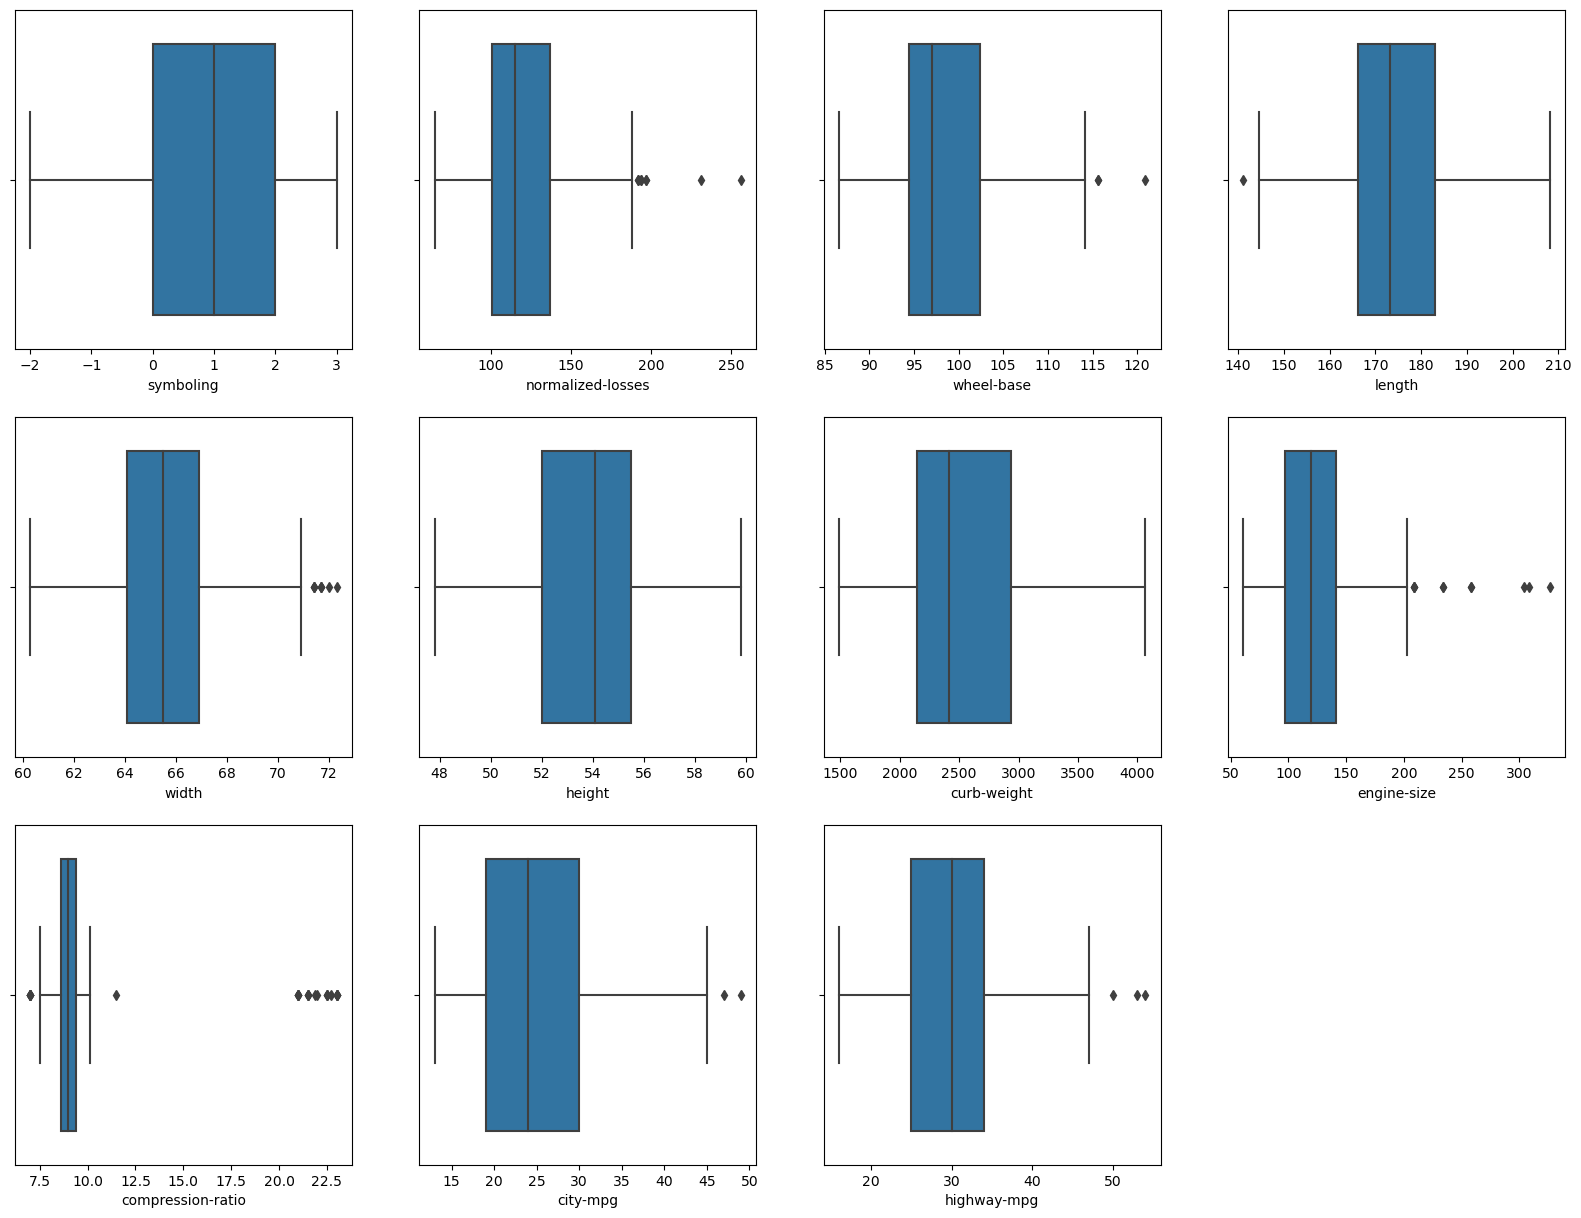

In [17]:
# Outliers detection using boxplots
plt.figure(figsize = (20,15))

plt.subplot(3,4,1)
sns.boxplot(data['symboling'])

plt.subplot(3,4,2)
sns.boxplot(data['normalized-losses'])

plt.subplot(3,4,3)
sns.boxplot(data['wheel-base'])

plt.subplot(3,4,4)
sns.boxplot(data['length'])

plt.subplot(3,4,5)
sns.boxplot(data['width'])

plt.subplot(3,4,6)
sns.boxplot(data['height'])

plt.subplot(3,4,7)
sns.boxplot(data['curb-weight'])

plt.subplot(3,4,8)
sns.boxplot(data['engine-size'])

plt.subplot(3,4,9)
sns.boxplot(data['compression-ratio'])

plt.subplot(3,4,10)
sns.boxplot(data['city-mpg'])

plt.subplot(3,4,11)
sns.boxplot(data['highway-mpg'])

plt.show()

From the above boxplots we can infer that out 11 continuous variables 8 of them have outliers. These outlier imputed with the 5th and 95th percentile.

In [18]:
data['symboling'] = data['symboling'].clip(lower = data['symboling'].quantile(0.05), upper = data['symboling'].quantile(0.95))

data['normalized-losses'] = data['normalized-losses'].clip(lower = data['normalized-losses'].quantile(0.05), upper = data['normalized-losses'].quantile(0.95))

data['wheel-base'] = data['wheel-base'].clip(lower = data['wheel-base'].quantile(0.05), upper = data['wheel-base'].quantile(0.95))

data['length'] = data['length'].clip(lower = data['length'].quantile(0.05), upper = data['length'].quantile(0.95))

data['width'] = data['width'].clip(lower = data['width'].quantile(0.05), upper = data['width'].quantile(0.95))

data['height'] = data['height'].clip(lower = data['height'].quantile(0.05), upper = data['height'].quantile(0.95))

data['curb-weight'] = data['curb-weight'].clip(lower = data['curb-weight'].quantile(0.05), upper = data['curb-weight'].quantile(0.95))

data['engine-size']  = data['engine-size'].clip(lower = data['engine-size'].quantile(0.05), upper = data['engine-size'].quantile(0.95))

data['compression-ratio'] = data['compression-ratio'].clip(lower = data['compression-ratio'].quantile(0.05), upper = data['compression-ratio'].quantile(0.95))

data['city-mpg'] = data['city-mpg'].clip(lower = data['city-mpg'].quantile(0.05), upper = data['city-mpg'].quantile(0.95))

data['highway-mpg'] = data['highway-mpg'].clip(lower = data['highway-mpg'].quantile(0.05), upper = data['highway-mpg'].quantile(0.95))

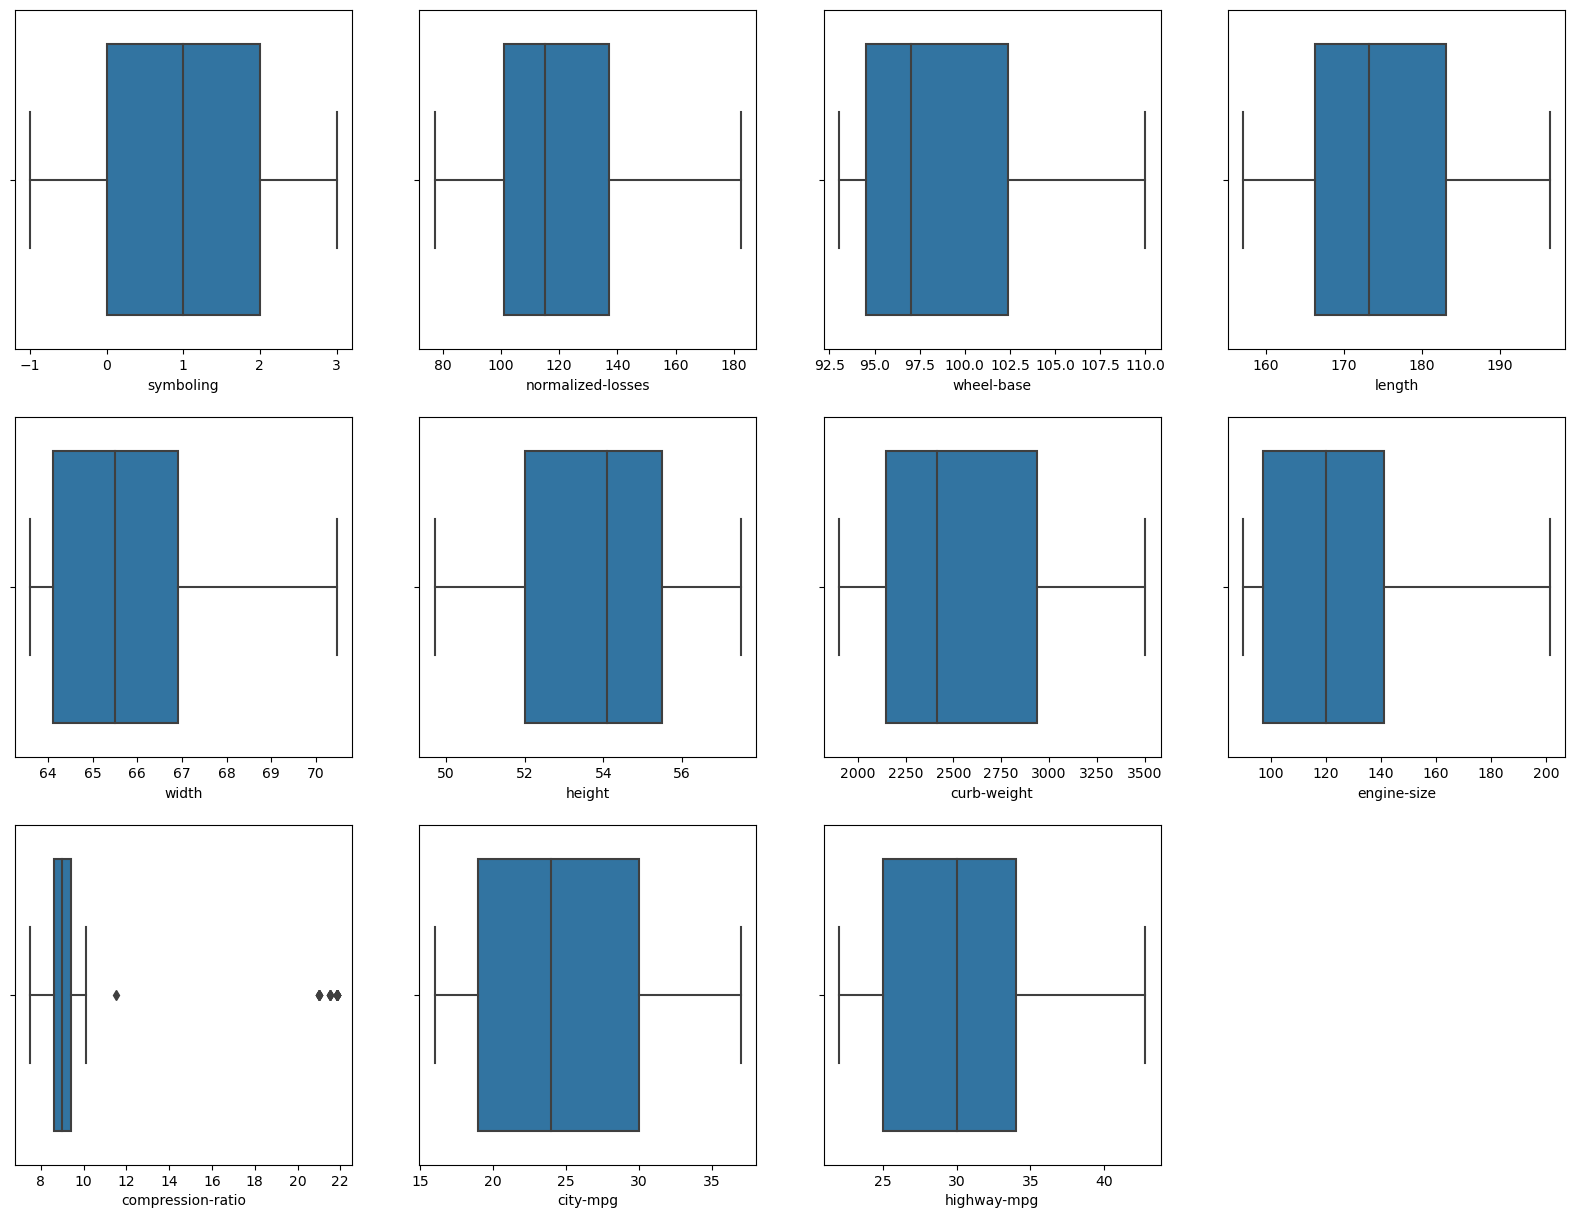

In [19]:
plt.figure(figsize = (20,15))

plt.subplot(3,4,1)
sns.boxplot(data['symboling'])

plt.subplot(3,4,2)
sns.boxplot(data['normalized-losses'])

plt.subplot(3,4,3)
sns.boxplot(data['wheel-base'])

plt.subplot(3,4,4)
sns.boxplot(data['length'])

plt.subplot(3,4,5)
sns.boxplot(data['width'])

plt.subplot(3,4,6)
sns.boxplot(data['height'])

plt.subplot(3,4,7)
sns.boxplot(data['curb-weight'])

plt.subplot(3,4,8)
sns.boxplot(data['engine-size'])

plt.subplot(3,4,9)
sns.boxplot(data['compression-ratio'])

plt.subplot(3,4,10)
sns.boxplot(data['city-mpg'])

plt.subplot(3,4,11)
sns.boxplot(data['highway-mpg'])

plt.show()

Now, as we can see in compression column have still outliers. lets try to manipulating the percentile values.

In [20]:
data['compression-ratio'] = data['compression-ratio'].clip(lower = data['compression-ratio'].quantile(0.15), upper = data['compression-ratio'].quantile(0.85))

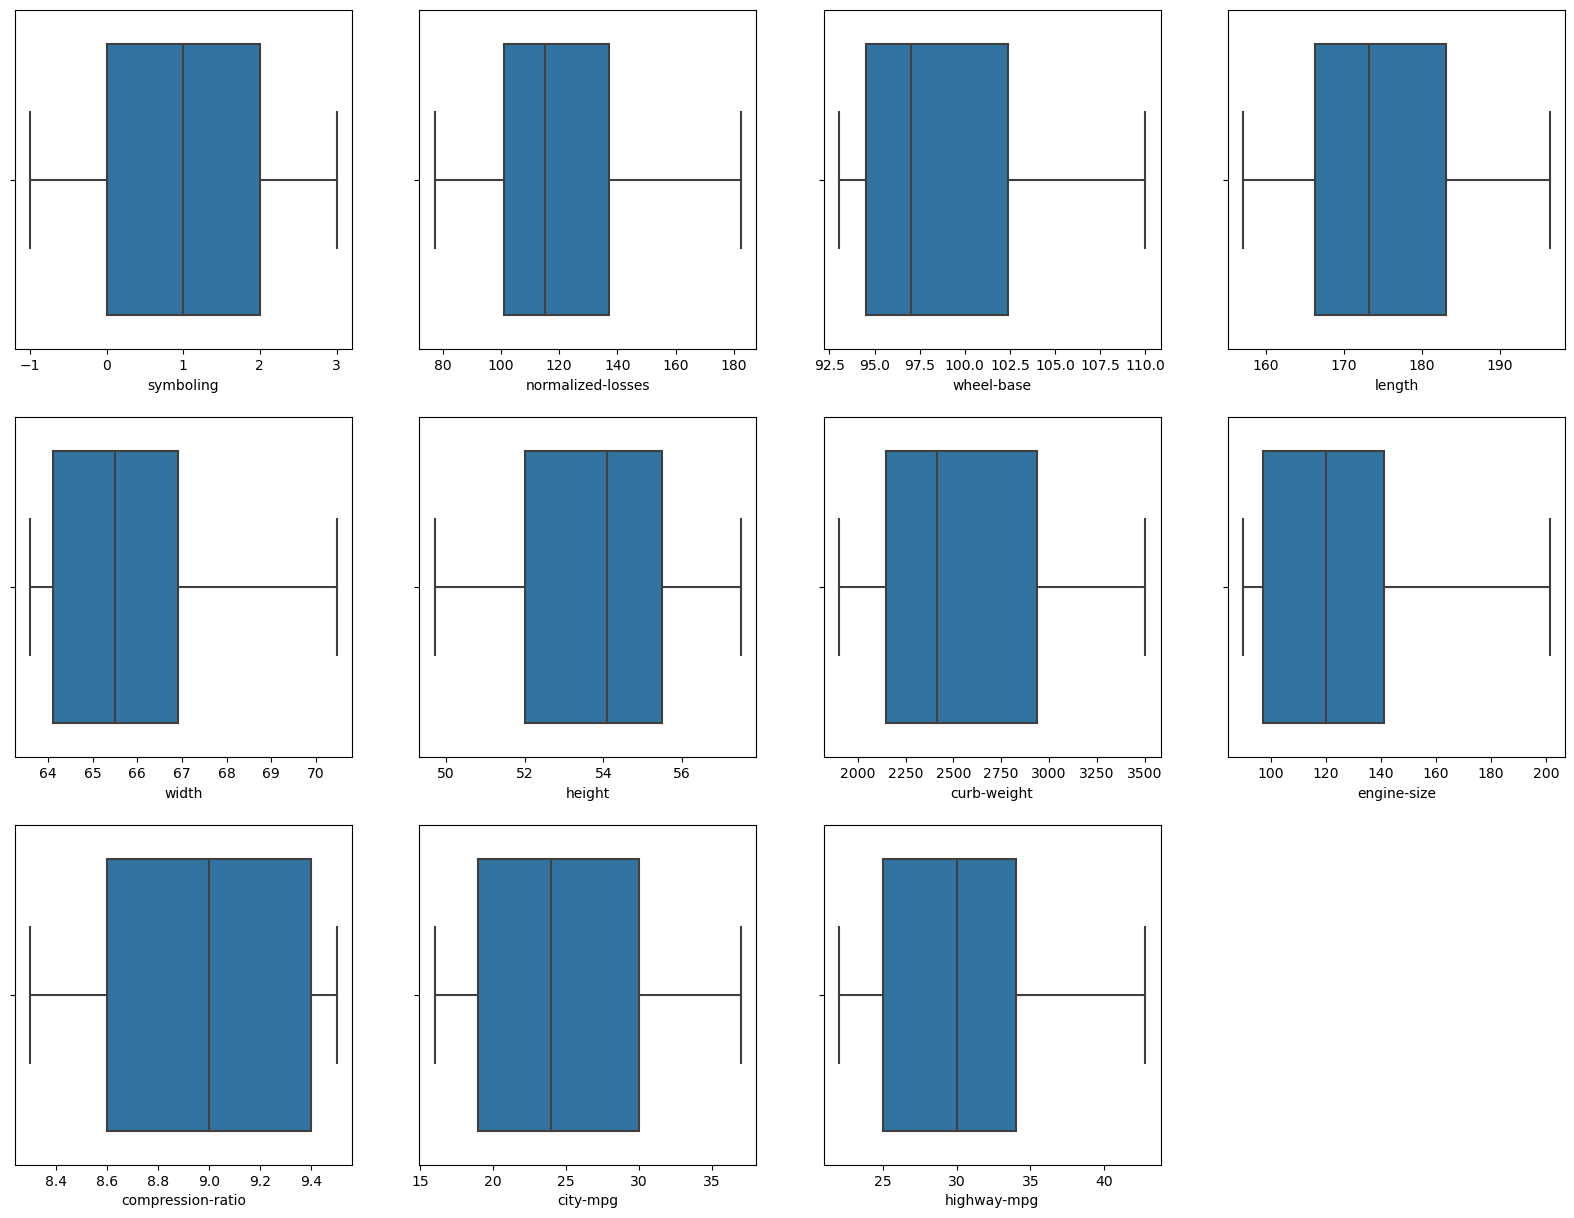

In [21]:
plt.figure(figsize = (20,15))

plt.subplot(3,4,1)
sns.boxplot(data['symboling'])

plt.subplot(3,4,2)
sns.boxplot(data['normalized-losses'])

plt.subplot(3,4,3)
sns.boxplot(data['wheel-base'])

plt.subplot(3,4,4)
sns.boxplot(data['length'])

plt.subplot(3,4,5)
sns.boxplot(data['width'])

plt.subplot(3,4,6)
sns.boxplot(data['height'])

plt.subplot(3,4,7)
sns.boxplot(data['curb-weight'])

plt.subplot(3,4,8)
sns.boxplot(data['engine-size'])

plt.subplot(3,4,9)
sns.boxplot(data['compression-ratio'])

plt.subplot(3,4,10)
sns.boxplot(data['city-mpg'])

plt.subplot(3,4,11)
sns.boxplot(data['highway-mpg'])

plt.show()

# Data Visualization.

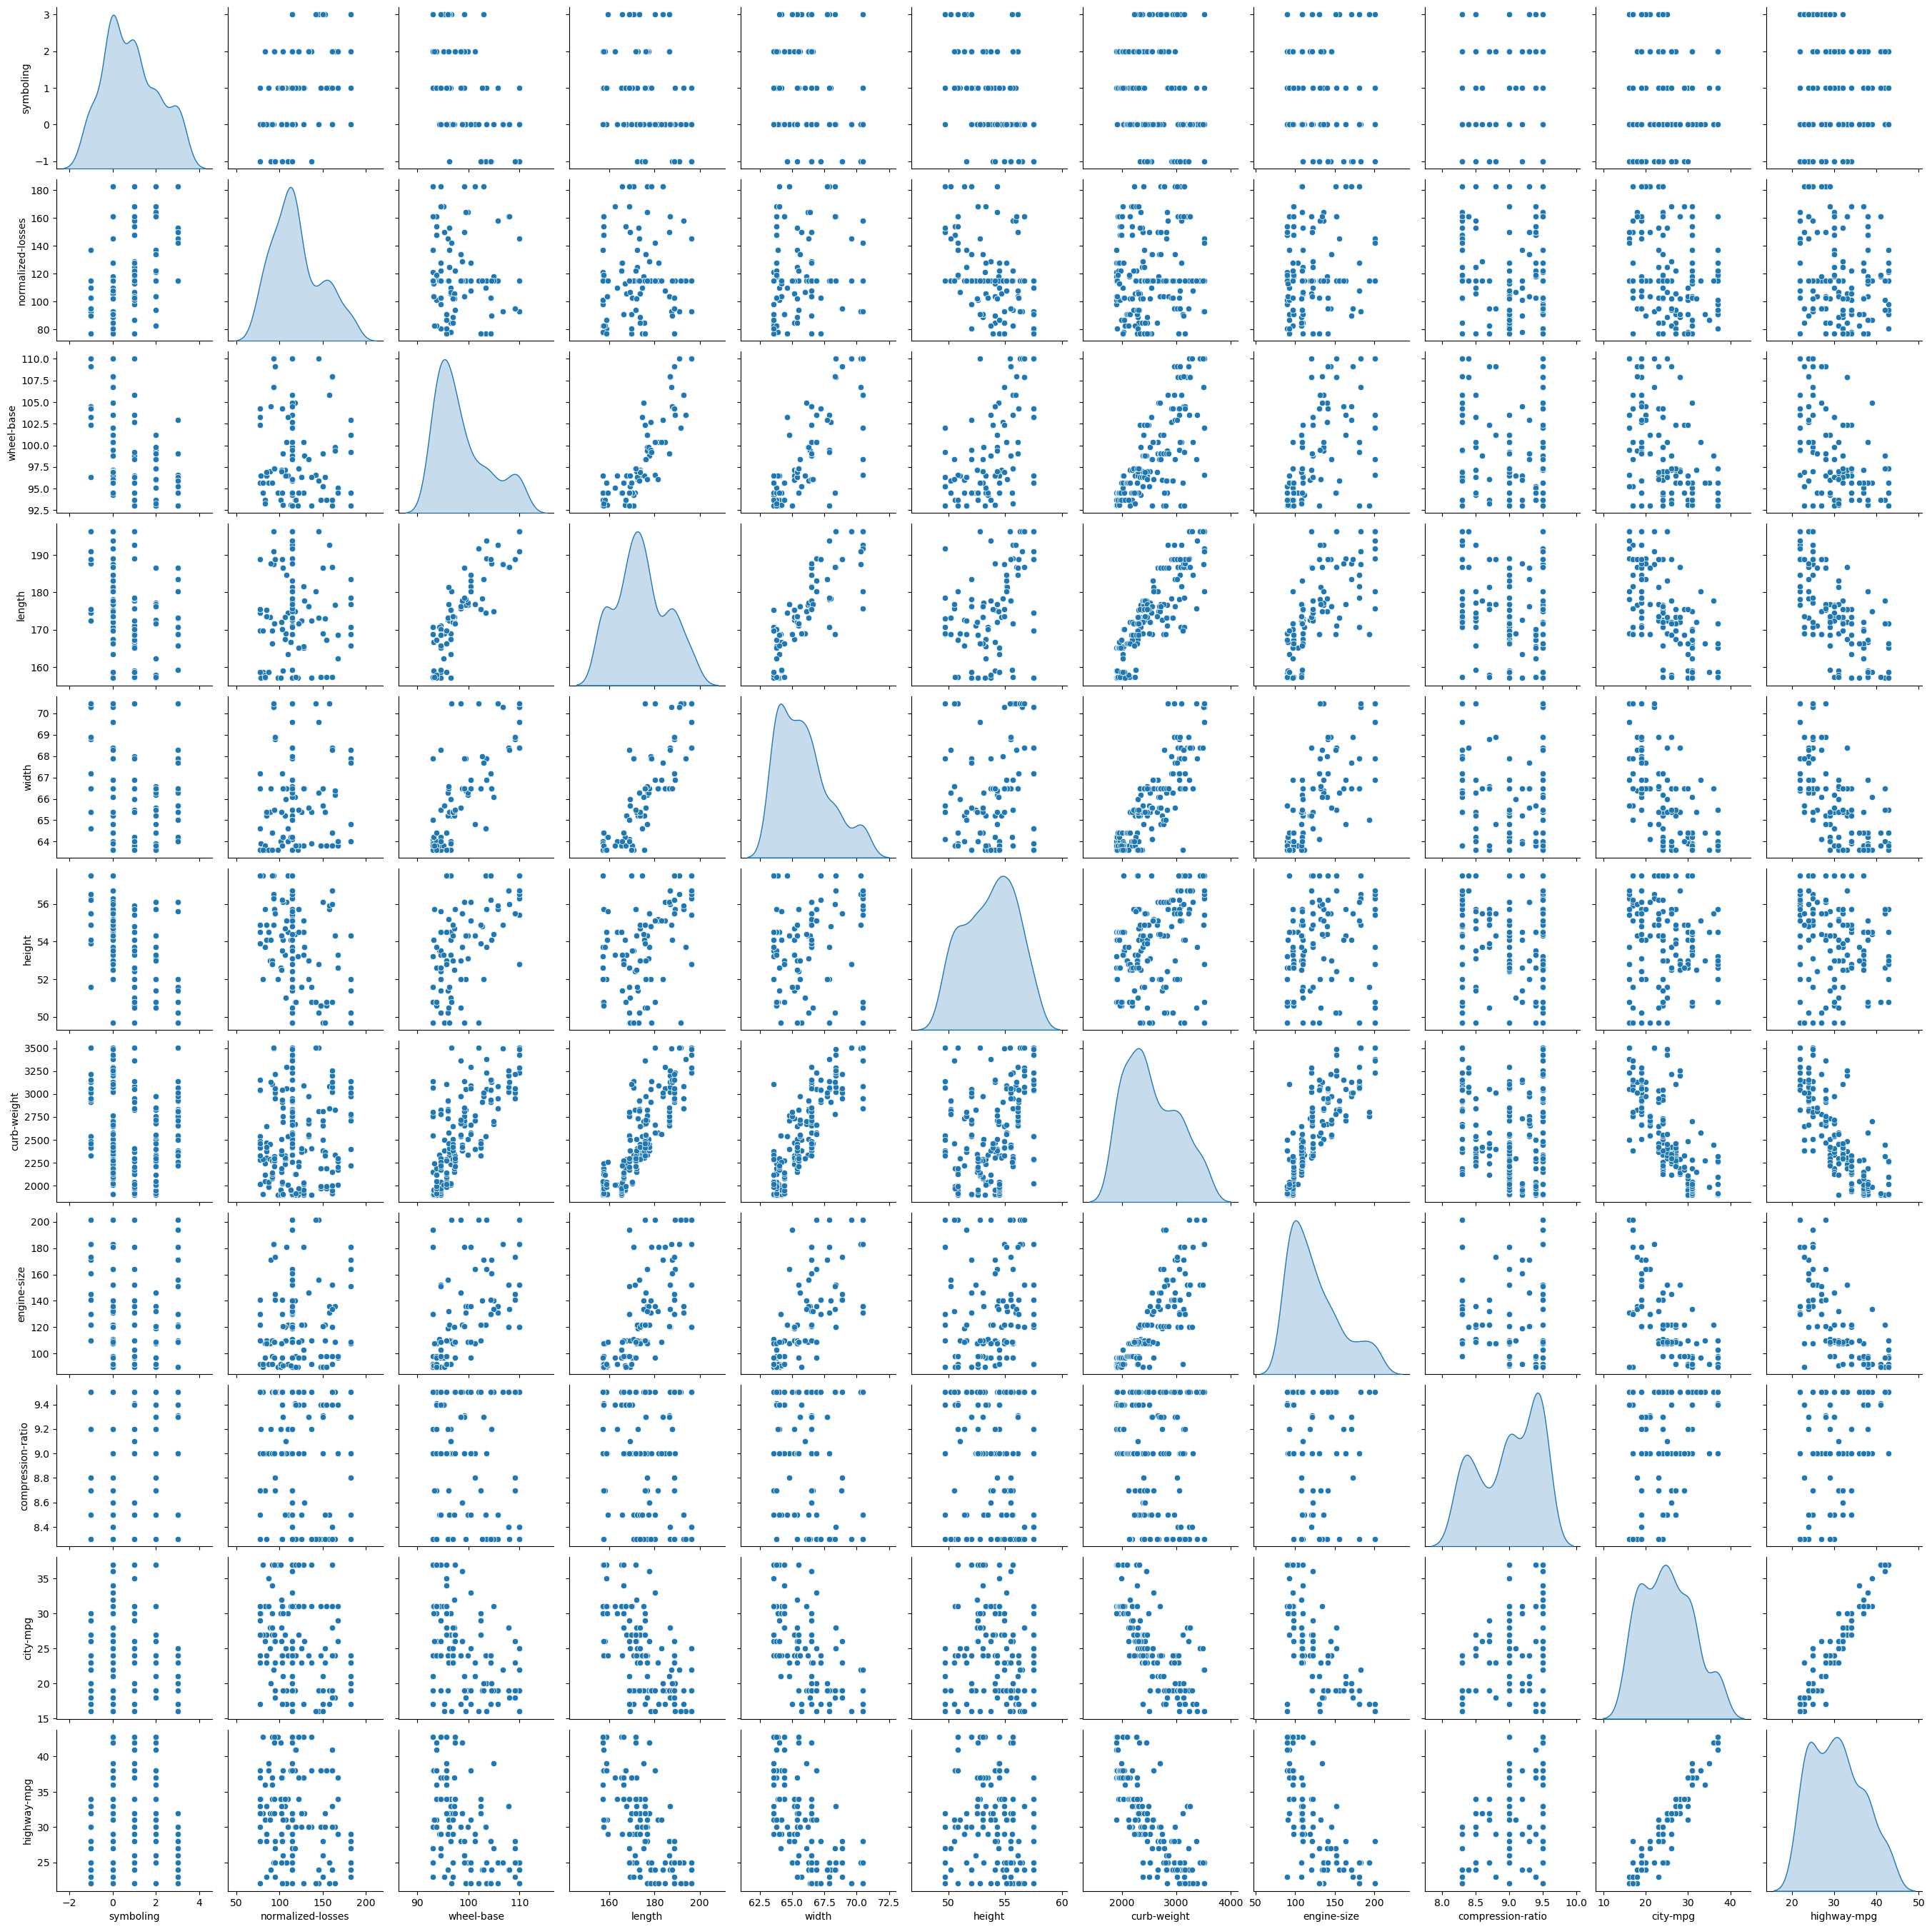

In [22]:
sns.pairplot(data, diag_kind = 'kde')
plt.show()

Some of the kernel density estimate plots more than 1 peak, Indicating the preasence of cluster in the dataset.

In [23]:
data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

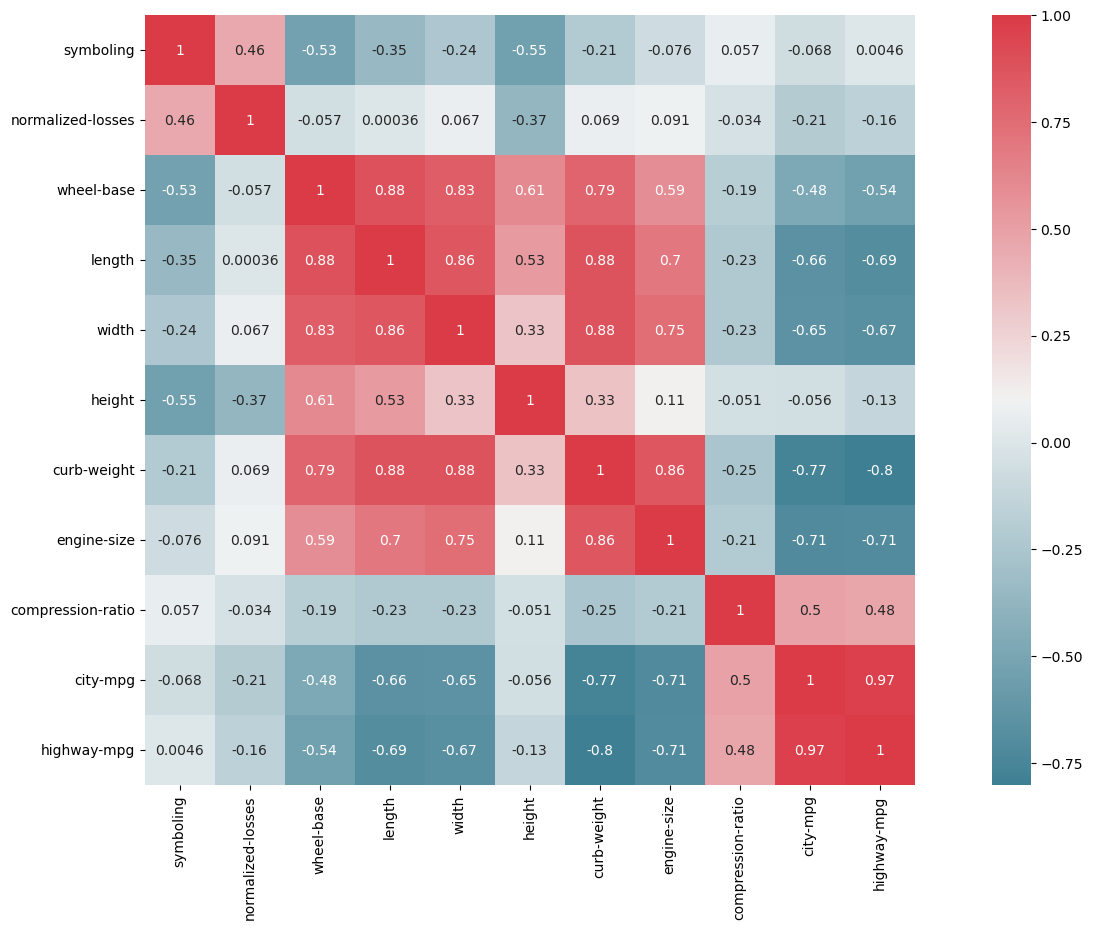

In [24]:
f, ax = plt.subplots(figsize = (20,10))
corr = data.corr('pearson')
sns.heatmap(corr, mask = np.zeros_like(corr, dtype = np.bool), cmap = sns.diverging_palette(220,10, as_cmap = True),
           square = True, ax = ax, annot = True) 
plt.show()

The above corrplot shows presence of multi colinearity in the dataset.

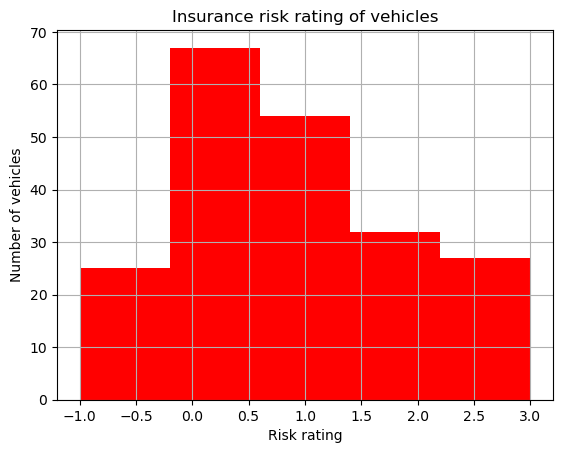

In [25]:
data.symboling.hist(bins = 5, color = 'red')
plt.title('Insurance risk rating of vehicles')
plt.ylabel("Number of vehicles")
plt.xlabel('Risk rating');

From the above histogram we can infer that a major part of distribution lies betwin the range 0.5-1.5. So we can also infer that a large in data set are safe. 

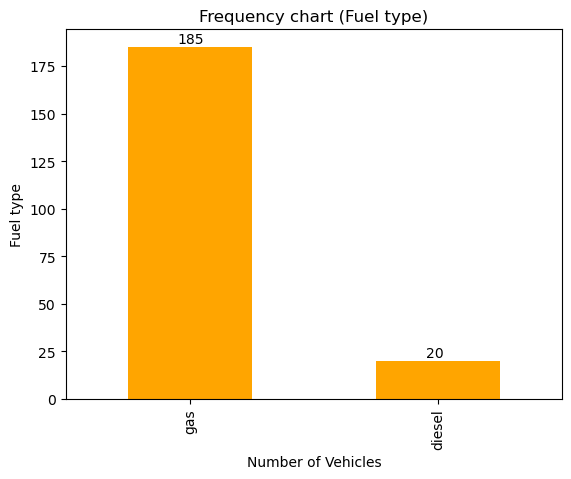

In [26]:
ax = data['fuel-type'].value_counts().plot(kind = 'bar', color = 'orange')
for i in ax.patches:
    ax.text(i.get_x()+0.2, i.get_height()+2, str(i.get_height()), fontsize = 10)
plt.title('Frequency chart (Fuel type)')
plt.ylabel("Fuel type")
plt.xlabel("Number of Vehicles")
plt.show()

From the above bar graph we can infer that mejority of cars recorded in this dataset run on gas.


# Data Preprocessing

This dataset has 15 categorical variables and most of them have more than 2 categories. We can not run a regression model on the text data. so in the order of deal with this challenge lets learn about label encoding is the process of converting categorical(text) data into numerical data.

Lets see how this is done.

In this example we will be working with the variable 'body-style' which has 5 categorie, namely - 

    1. covertible
    2. Hatchback
    3. Sedan
    4. Wegon
    5. Hardtop

In [27]:
# data before lable encoding:
data['body-style'].head(20)

0     convertible
1     convertible
2       hatchback
3           sedan
4           sedan
5           sedan
6           sedan
7           wagon
8           sedan
9       hatchback
10          sedan
11          sedan
12          sedan
13          sedan
14          sedan
15          sedan
16          sedan
17          sedan
18      hatchback
19      hatchback
Name: body-style, dtype: object

In [28]:
# Label Encoding

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

data['body-style'] = labelencoder.fit_transform(data['body-style'])

In [29]:
data['body-style'].head(20)

0     0
1     0
2     2
3     3
4     3
5     3
6     3
7     4
8     3
9     2
10    3
11    3
12    3
13    3
14    3
15    3
16    3
17    3
18    2
19    2
Name: body-style, dtype: int32

After running the label encoding code, we can see that the variable body-bodystyle has numerical values ranging from 0-4.

The Problem with label encoding that it introduces an order between the catogories . i.e. 0>1>2>3>4 this might confuse the model is thinking that covertible is greater than hatchback.

So deal with this problem, lets understand the concept of one hot encoding.

In one hot encoding, categorical column that have been label encoded are split into multiple and the value are replaced with 0's and 1's. 

1's marks presence of a value.
0's marks absence of a value.

In [30]:
# data before one hot encoding.
data['body-style'].head(10)

0    0
1    0
2    2
3    3
4    3
5    3
6    3
7    4
8    3
9    2
Name: body-style, dtype: int32

In [31]:
# one hot encoding
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown = 'ignore')

enc_df = pd.DataFrame(enc.fit_transform(data[['body-style']]).toarray())

In [32]:
# data after onehot encoding
enc_df.head(10)

,0,1,2,3,4
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,0.0,1.0,0.0
6,0.0,0.0,0.0,1.0,0.0
7,0.0,0.0,0.0,0.0,1.0
8,0.0,0.0,0.0,1.0,0.0
9,0.0,0.0,1.0,0.0,0.0


In [33]:
# another way to do one hot encoding.
one_hot = pd.get_dummies(data['body-style'])
one_hot.head(5)

,0,1,2,3,4
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0
